<a href="https://colab.research.google.com/github/eduardosci/Prevendo-vendas-futuras-com-prophet/blob/main/Previsao_de_vendas_futuras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from matplotlib import pyplot
from pandas import DataFrame
import plotly.offline as py
import plotly.graph_objs as go
import pandas.util.testing as tm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from fbprophet import Prophet

In [5]:
series = pd.read_csv('champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [6]:
series.tail()

Month
1972-05-01    4618
1972-06-01    5312
1972-07-01    4298
1972-08-01    1413
1972-09-01    5877
Name: Sales, dtype: int64

In [8]:
type(series)

pandas.core.series.Series

Explorando e resumindo os dados

In [17]:
#Agrupando vendas por ano
grupos = series.groupby(Grouper(freq='A'))
anos = DataFrame()
for nome, grupo in grupos:
  anos[nome.year] = grupo.values

In [18]:
anos

,1964,1965,1966,1967,1968,1969,1970,1971
0,2815,2541,3113,5375,3633,4016,2639,3934
1,2672,2475,3006,3088,4292,3957,2899,3162
2,2755,3031,4047,3718,4154,4510,3370,4286
3,2721,3266,3523,4514,4121,4276,3740,4676
4,2946,3776,3937,4520,4647,4968,2927,5010
5,3036,3230,3986,4539,4753,4677,3986,4874
6,2282,3028,3260,3663,3965,3523,4217,4633
7,2212,1759,1573,1643,1723,1821,1738,1659
8,2922,3595,3528,4739,5048,5222,5221,5951
9,4301,4474,5211,5428,6922,6872,6424,6981


In [28]:
resample = series.resample('2M')

Criando uma variável para receber os dados do tipo série.


In [29]:
vendas_medias_dois_meses = resample.mean()

In [30]:
print(vendas_medias_dois_meses.head(15))

Month
1964-01-31    2815.0
1964-03-31    2713.5
1964-05-31    2833.5
1964-07-31    2659.0
1964-09-30    2567.0
1964-11-30    5032.5
1965-01-31    4926.5
1965-03-31    2753.0
1965-05-31    3521.0
1965-07-31    3129.0
1965-09-30    2677.0
1965-11-30    5656.0
1966-01-31    5735.0
1966-03-31    3526.5
1966-05-31    3730.0
Freq: 2M, Name: Sales, dtype: float64


In [31]:
data = [go.Scatter(x=vendas_medias_dois_meses.index,
                   y=vendas_medias_dois_meses.values)]

# Criando Layout:
configuracoes_layout = go.Layout(title='Vendas médias a cada dois meses',
                                 title_x=0.5,
                                 yaxis={'title':'Média de vendas'},
                                 xaxis={'title':'Periodo'})                   


# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

Venda por trimestres

In [32]:
upsampled = series.resample('Q')

In [33]:
vendas_trimestre = upsampled.mean()

In [34]:
print (vendas_trimestre)

Month
1964-03-31     2747.333333
1964-06-30     2901.000000
1964-09-30     2472.000000
1964-12-31     5792.333333
1965-03-31     2682.333333
1965-06-30     3424.000000
1965-09-30     2794.000000
1965-12-31     6556.333333
1966-03-31     3388.666667
1966-06-30     3815.333333
1966-09-30     2787.000000
1966-12-31     7359.666667
1967-03-31     4060.333333
1967-06-30     4524.333333
1967-09-30     3348.333333
1967-12-31     8131.000000
1968-03-31     4026.333333
1968-06-30     4507.000000
1968-09-30     3578.666667
1968-12-31     9370.333333
1969-03-31     4161.000000
1969-06-30     4640.333333
1969-09-30     3522.000000
1969-12-31    10530.333333
1970-03-31     2969.333333
1970-06-30     3551.000000
1970-09-30     3725.333333
1970-12-31     9780.666667
1971-03-31     3794.000000
1971-06-30     4853.333333
1971-09-30     4081.000000
1971-12-31     9834.000000
Freq: Q-DEC, Name: Sales, dtype: float64


Grafico de vendas por trimestre

In [35]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter(x=vendas_trimestre.index,
                   y=vendas_trimestre.values)]

# Criando Layout:
configuracoes_layout = go.Layout(title='Vendas médias por trimestre',
                                 title_x=0.5,
                                 yaxis={'title':'Média de vendas'},
                                 xaxis={'title':'Periodo'})                   


# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

Calculando a média de vendas por ano

In [39]:
resample = series.resample('A')

In [40]:
vendas_medias_por_ano = resample.mean() 
print(vendas_medias_por_ano.head())

Month
1964-12-31    3478.166667
1965-12-31    3864.166667
1966-12-31    4337.666667
1967-12-31    5016.000000
1968-12-31    5370.583333
Freq: A-DEC, Name: Sales, dtype: float64


In [41]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter(x=vendas_medias_por_ano.index,
                   y=vendas_medias_por_ano.values,
                   marker = {'color':'green'})
                   ]

# Criando Layout:
configuracoes_layout = go.Layout(title='Média de Vendas por Ano',
                                 title_x=0.5,
                                 yaxis={'title':'Média de vendas'},
                                 xaxis={'title':'Periodo'})                   


# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

Decompondo a serie

Modelo aditivo

In [44]:
resultado = seasonal_decompose(series,  model='additive')

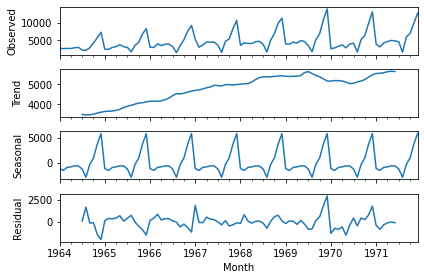

In [45]:
resultado.plot()
pyplot.show()

Modelo multiplicativo

In [46]:
resultado = seasonal_decompose(series,  model='multiplicative')

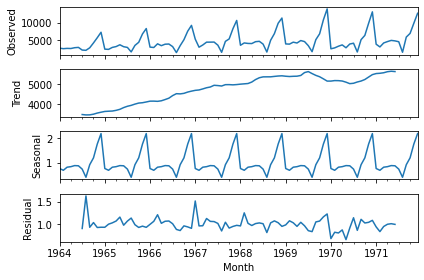

In [47]:
resultado.plot()
pyplot.show()

Prevendo dados futuros com Prophet

**Separando os dados para treino, teste e validação**
  - **dataset.csv**: Dados de 1964 a setembro de 1971.

  - **validation.csv**: Dados de Outubro de 1971 a Outubro de 1972 (1 ano de vendas).


In [48]:
split_point = len(series) - 12

In [49]:
dataset = series[0:split_point]

In [50]:
validation = series[split_point:]

In [51]:
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 84, Validation 12


In [52]:
dataset.to_csv('dataset.csv')

In [53]:
validation.to_csv('validation.csv')

In [55]:
series = pd.read_csv('/content/dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [57]:
series.describe()

count       84.000000
mean      4683.797619
std       2585.863887
min       1573.000000
25%       3030.250000
50%       3986.000000
75%       5213.500000
max      13916.000000
Name: Sales, dtype: float64

*   A média é de 4,683, isso significa que o nível da nossa série é de 4,683 vendas em média.
*   O desvio padrão é relativamente alto, 2,585 vendas variando a partir da média.
*   Os quartis juntamente com o desvio padrão nos mostra que os dados estão espalhados da média.

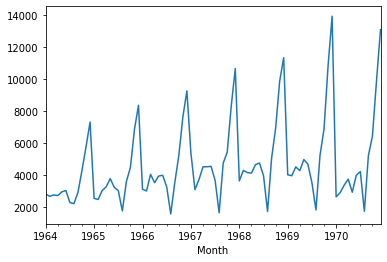

In [58]:
series.plot()

   - Aparentemente existe um aumento de tendência de vendas ao longo dos anos.
   - Aparentemente existe uma sazonalidade nas vendas por anos.
   - Aparentemente a amplitude da sazonalidade aumenta conforme a tendência, isso pode sugerir um relacionamento multiplicativo.
   - Aparentemente não existe qualquer outlier.
   - Como vimos que há uma tendência e uma sazonalidade (obvias) isso nos dá forte indício que estamos trabalhando com uma série não estacionária.

**Visualizando a Sazonalidade**

Podemos confirmar nossa suposição de que a sazonalidae é anual. No código abaixo plotei os dados agrupados por ano para visualizar as vendas de cada ano. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcee2ffabd0>,
      dtype=object)

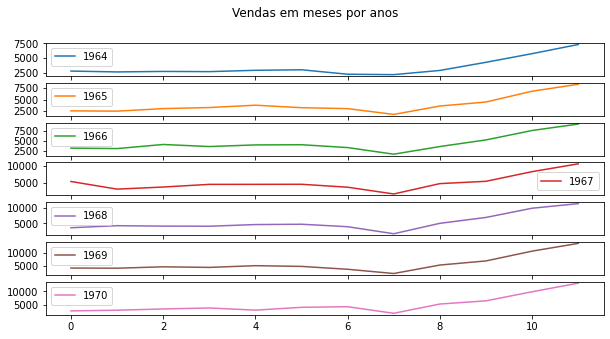

In [59]:
grupos = series['1964':'1970'].groupby(Grouper(freq='A'))
anos = DataFrame()
for nome, grupo in grupos:
  anos[nome.year] = grupo.values

anos.plot(figsize=(10,5)
          ,subplots=True
          ,title='Vendas em meses por anos')

Podemos ver claramente que as vendas caem no mes de agosto e aumentam no final do mes seguinte ate o final do ano.

**Plotando a distribuição da Série**

-  A distribuição não é normal.
-  A forma tem uma longa cauda a direita. Isso pode sugerir algum tipo de transformação.

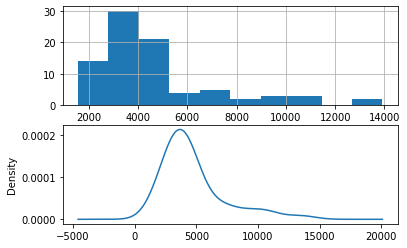

In [60]:
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

**Visualizando Autocorrelação**

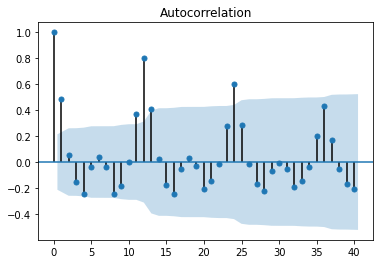

In [61]:
plot_acf(series, lags=40)
pyplot.show()

**Checando Estacionariedade**

In [64]:
resultado = adfuller(series.values)
print('\nADF teste: %f' % resultado[0])
print('\np-value: %f' % resultado[1])
print('\nCritical Values:')
for key, value in resultado[4].items():
  print('\t%s: %.3f' % (key, value))


ADF teste: -2.295554

p-value: 0.173406

Critical Values:
	1%: -3.525
	5%: -2.903
	10%: -2.589


A serie nao eh estacionaria

**Criando baseline**

In [65]:
X = series.values

In [66]:
train_size = int(len(X) * 0.50)

In [67]:
train = X[0:train_size]
test = X[train_size:]

In [68]:
history = [x for x in train]

In [69]:
history[:10]

[2815, 2672, 2755, 2721, 2946, 3036, 2282, 2212, 2922, 4301]

In [70]:
history[-1]

4539

In [71]:
predictions = list()

In [72]:
for i in range(len(test)):
  valor_predito = history[-1]
  predictions.append(valor_predito)
  valor_real = test[i]
  history.append(valor_real)
  print('Valor Predito=%.3f, Valor }Esperado=%3.f' % (valor_predito, valor_real))

Valor Predito=4539.000, Valor }Esperado=3663
Valor Predito=3663.000, Valor }Esperado=1643
Valor Predito=1643.000, Valor }Esperado=4739
Valor Predito=4739.000, Valor }Esperado=5428
Valor Predito=5428.000, Valor }Esperado=8314
Valor Predito=8314.000, Valor }Esperado=10651
Valor Predito=10651.000, Valor }Esperado=3633
Valor Predito=3633.000, Valor }Esperado=4292
Valor Predito=4292.000, Valor }Esperado=4154
Valor Predito=4154.000, Valor }Esperado=4121
Valor Predito=4121.000, Valor }Esperado=4647
Valor Predito=4647.000, Valor }Esperado=4753
Valor Predito=4753.000, Valor }Esperado=3965
Valor Predito=3965.000, Valor }Esperado=1723
Valor Predito=1723.000, Valor }Esperado=5048
Valor Predito=5048.000, Valor }Esperado=6922
Valor Predito=6922.000, Valor }Esperado=9858
Valor Predito=9858.000, Valor }Esperado=11331
Valor Predito=11331.000, Valor }Esperado=4016
Valor Predito=4016.000, Valor }Esperado=3957
Valor Predito=3957.000, Valor }Esperado=4510
Valor Predito=4510.000, Valor }Esperado=4276
Valor 

In [74]:
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 3004.339


**Criando o modelo com o prophet**



In [76]:
dataframe = pd.DataFrame({'ds': dataset.index, 'y': dataset.values})

In [78]:
dataframe.head()

,ds,y
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [79]:
model = Prophet()

In [80]:
model.fit(dataframe)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [81]:
futuro = model.make_future_dataframe(periods = 12, freq='M')

In [82]:
futuro

,ds
0,1964-01-01
1,1964-02-01
2,1964-03-01
3,1964-04-01
4,1964-05-01
...,...
91,1971-07-31
92,1971-08-31
93,1971-09-30
94,1971-10-31


In [83]:
saida = model.predict(futuro)

In [84]:
saida.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1964-01-01,3618.160320,1614.172960,3591.703265,3618.160320,3618.160320,-997.738132,-997.738132,-997.738132,-997.738132,-997.738132,-997.738132,0.0,0.0,0.0,2620.422189
1,1964-02-01,3647.003184,1323.710223,3322.690762,3647.003184,3647.003184,-1341.254350,-1341.254350,-1341.254350,-1341.254350,-1341.254350,-1341.254350,0.0,0.0,0.0,2305.748834
2,1964-03-01,3673.985217,1882.035348,3889.669970,3673.985217,3673.985217,-731.454674,-731.454674,-731.454674,-731.454674,-731.454674,-731.454674,0.0,0.0,0.0,2942.530544
3,1964-04-01,3702.828081,1640.980503,3660.033074,3702.828081,3702.828081,-1043.890537,-1043.890537,-1043.890537,-1043.890537,-1043.890537,-1043.890537,0.0,0.0,0.0,2658.937544
4,1964-05-01,3730.740530,1987.316190,4035.744221,3730.740530,3730.740530,-693.680786,-693.680786,-693.680786,-693.680786,-693.680786,-693.680786,0.0,0.0,0.0,3037.059744


In [85]:
saida[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
89,1971-05-31,5977.185379,4975.970654,6994.103863
90,1971-06-30,5759.321313,4803.362582,6728.847335
91,1971-07-31,2021.631153,937.509681,3108.381563
92,1971-08-31,6172.252498,5144.488845,7137.374946
93,1971-09-30,5817.775364,4840.132817,6868.781601
94,1971-10-31,9425.421322,8378.409357,10470.949046
95,1971-11-30,12825.096661,11804.695732,13829.573636


**Validando o modelo com Prophet**

In [86]:
validation_df = pd.DataFrame({'ds': validation.index})

In [87]:
validation_df['ds']

0    1971-01-01
1    1971-02-01
2    1971-03-01
3    1971-04-01
4    1971-05-01
5    1971-06-01
6    1971-07-01
7    1971-08-01
8    1971-09-01
9    1971-10-01
10   1971-11-01
11   1971-12-01
Name: ds, dtype: datetime64[ns]

In [88]:
saida = model.predict(validation_df)

In [89]:
saida[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1971-01-01,4854.645972,3866.930026,5915.105597
1,1971-02-01,4584.340221,3556.783693,5524.072975
2,1971-03-01,4584.855106,3498.639304,5627.091335
3,1971-04-01,5159.867778,4185.246256,6133.949734
4,1971-05-01,5176.010282,4277.545554,6183.304402
5,1971-06-01,5538.562459,4555.336635,6469.459222
6,1971-07-01,5073.376627,4034.986221,6072.429050
7,1971-08-01,2794.704575,1683.701828,3835.166246
8,1971-09-01,5820.019910,4815.636615,6857.415276
9,1971-10-01,6643.389926,5622.681270,7636.516206


In [90]:
validation

Month
1971-01-01     3934
1971-02-01     3162
1971-03-01     4286
1971-04-01     4676
1971-05-01     5010
1971-06-01     4874
1971-07-01     4633
1971-08-01     1659
1971-09-01     5951
1971-10-01     6981
1971-11-01     9851
1971-12-01    12670
Name: Sales, dtype: int64

In [91]:
rmse = sqrt(mean_squared_error(validation.values, saida.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 681.411


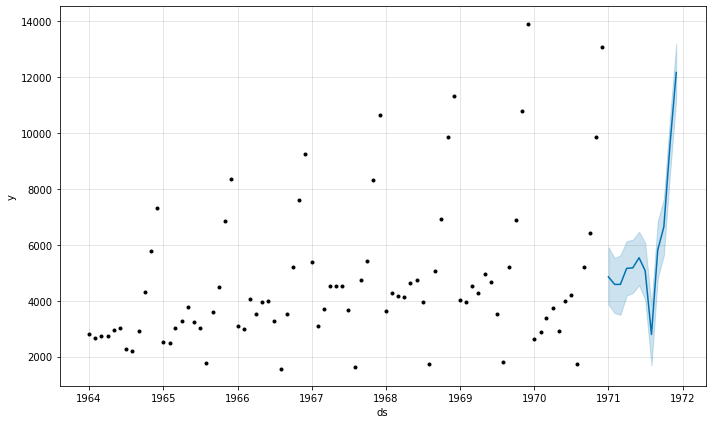

In [92]:
figura = model.plot(saida)

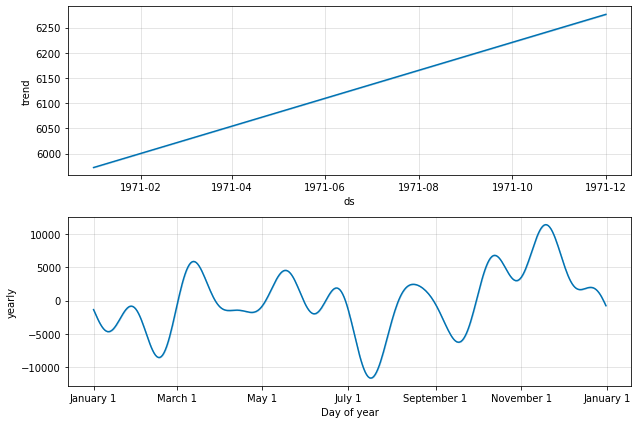

In [95]:
model.plot_components(saida)
pyplot.show()

**Tunado o modelo**

In [96]:
model = Prophet(seasonality_mode='multiplicative')

In [97]:
model.fit(dataframe)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [98]:
validation_df = pd.DataFrame({'ds': validation.index})

In [99]:
saida = model.predict(validation_df)

In [100]:
rmse = sqrt(mean_squared_error(validation.values, saida.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 521.264


Mudando o **seasonality_mode** para "multiplicative" reduzimos o erro para 521.264